Кирилл Лалаянц, R33352

# Лабораторная работа No4
## Астатизмы

Импорт необходимых для работы библиотек. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import control 
import sympy
import os
from tbcontrol.symbolic import routh
import math
import tqdm

SAVE_PATH = 'tex-report/figs/'
os.makedirs(SAVE_PATH, exist_ok=True)

sympy.init_printing()
p = sympy.Symbol("p")
s = sympy.Symbol("s")
t = sympy.Symbol("t")
T = sympy.Symbol("T")
I = sympy.I


def get_t(end_t = 10, dt=0.001, start_t = 0):
    return np.linspace(start_t, end_t, int(end_t / dt))

Task 1

In [3]:
def task1_tf(m1, m2):
    poly = sympy.simplify((p - m1) * (p - m2))
    coeffs = sympy.Poly(poly, p).all_coeffs()
    print(coeffs)
    ss = control.tf2ss(control.tf(1, np.array(coeffs, dtype=np.float64)))
    ss_reachable = control.canonical_form(ss, form="reachable")[0]
    return ss_reachable

def task1_simulate(m1, m2, k0, k1, ts, dt, gs, y0=2, closed_loop=True):
    TF = task1_tf(m1, m2)
    u = lambda e, de: k0 * e + k1 * de
    ys = [y0]
    dys = [0]
    es = [gs[0] - ys[0]]
    des = [0]
    us = []
    for indx, t in enumerate(ts):
        if indx < 1:
            continue
        
        us.append(u(es[-1], des[-1]))
        output = control.forced_response(TF, T=[t, t + dt], U=us[-1], X0=[dys[-1], ys[-1]])
        
        ys.append(output.outputs[-1])
        dys.append((ys[-1] - ys[-2]) / dt)
        if closed_loop:
            es.append(gs[indx] - ys[-1])
            des.append((es[-1] - es[-2]) / dt)
    ys = np.array(ys)
    us = np.array(us)
    gs = np.array(gs)
    dys = np.array(dys)
    des = np.array(des)
    es = np.array(es)
    return ys, (es, gs, us, dys, des)

def plot_task1(ys_open, ys_closed, gs, ts, save_name):
    f_size = 40
    fig, axs = plt.subplots(1, 2, figsize=(25, 17))
    fig.suptitle(f"Задание 1. Задача стабилизации с идеальным дифференцирующим звеном", fontsize=f_size, y=1)

    axs[0].plot(ts, ys_open, 'b', linewidth=8, label = 'y')
    axs[0].plot(ts, gs, 'r--', linewidth=8, label = f'g')
    axs[0].set_title(f"Open loop", fontsize=f_size)
    axs[0].set_xlabel(f"t, [c]", fontsize=f_size)
    axs[0].set_ylabel(f"y", fontsize=f_size)
    axs[0].tick_params(axis='both', which='major', labelsize=f_size/1.5)
    axs[0].tick_params(axis='both', which='minor', labelsize=f_size/1.5)
    
    axs[0].grid(True)
    axs[0].legend(fontsize=f_size, title_fontsize=f_size)
    
    axs[1].plot(ts, ys_closed, "b", linewidth=8, label = 'y')
    axs[1].plot(ts, gs, "r--", linewidth=8, label = 'g')
    axs[1].set_title(r"Closed loop", fontsize=f_size)
    axs[1].set_xlabel(f"t, [c]", fontsize=f_size)
    axs[1].set_ylabel(r"y", fontsize=f_size)
    axs[1].tick_params(axis='both', which='major', labelsize=f_size/1.5)
    axs[1].tick_params(axis='both', which='minor', labelsize=f_size/1.5)
    axs[1].grid(True)
    axs[1].legend(fontsize=f_size, title_fontsize=f_size)
    
    plt.savefig(f'{SAVE_PATH}/{save_name}')
    plt.show()

[1, -1, -2]
[1, -1, -2]


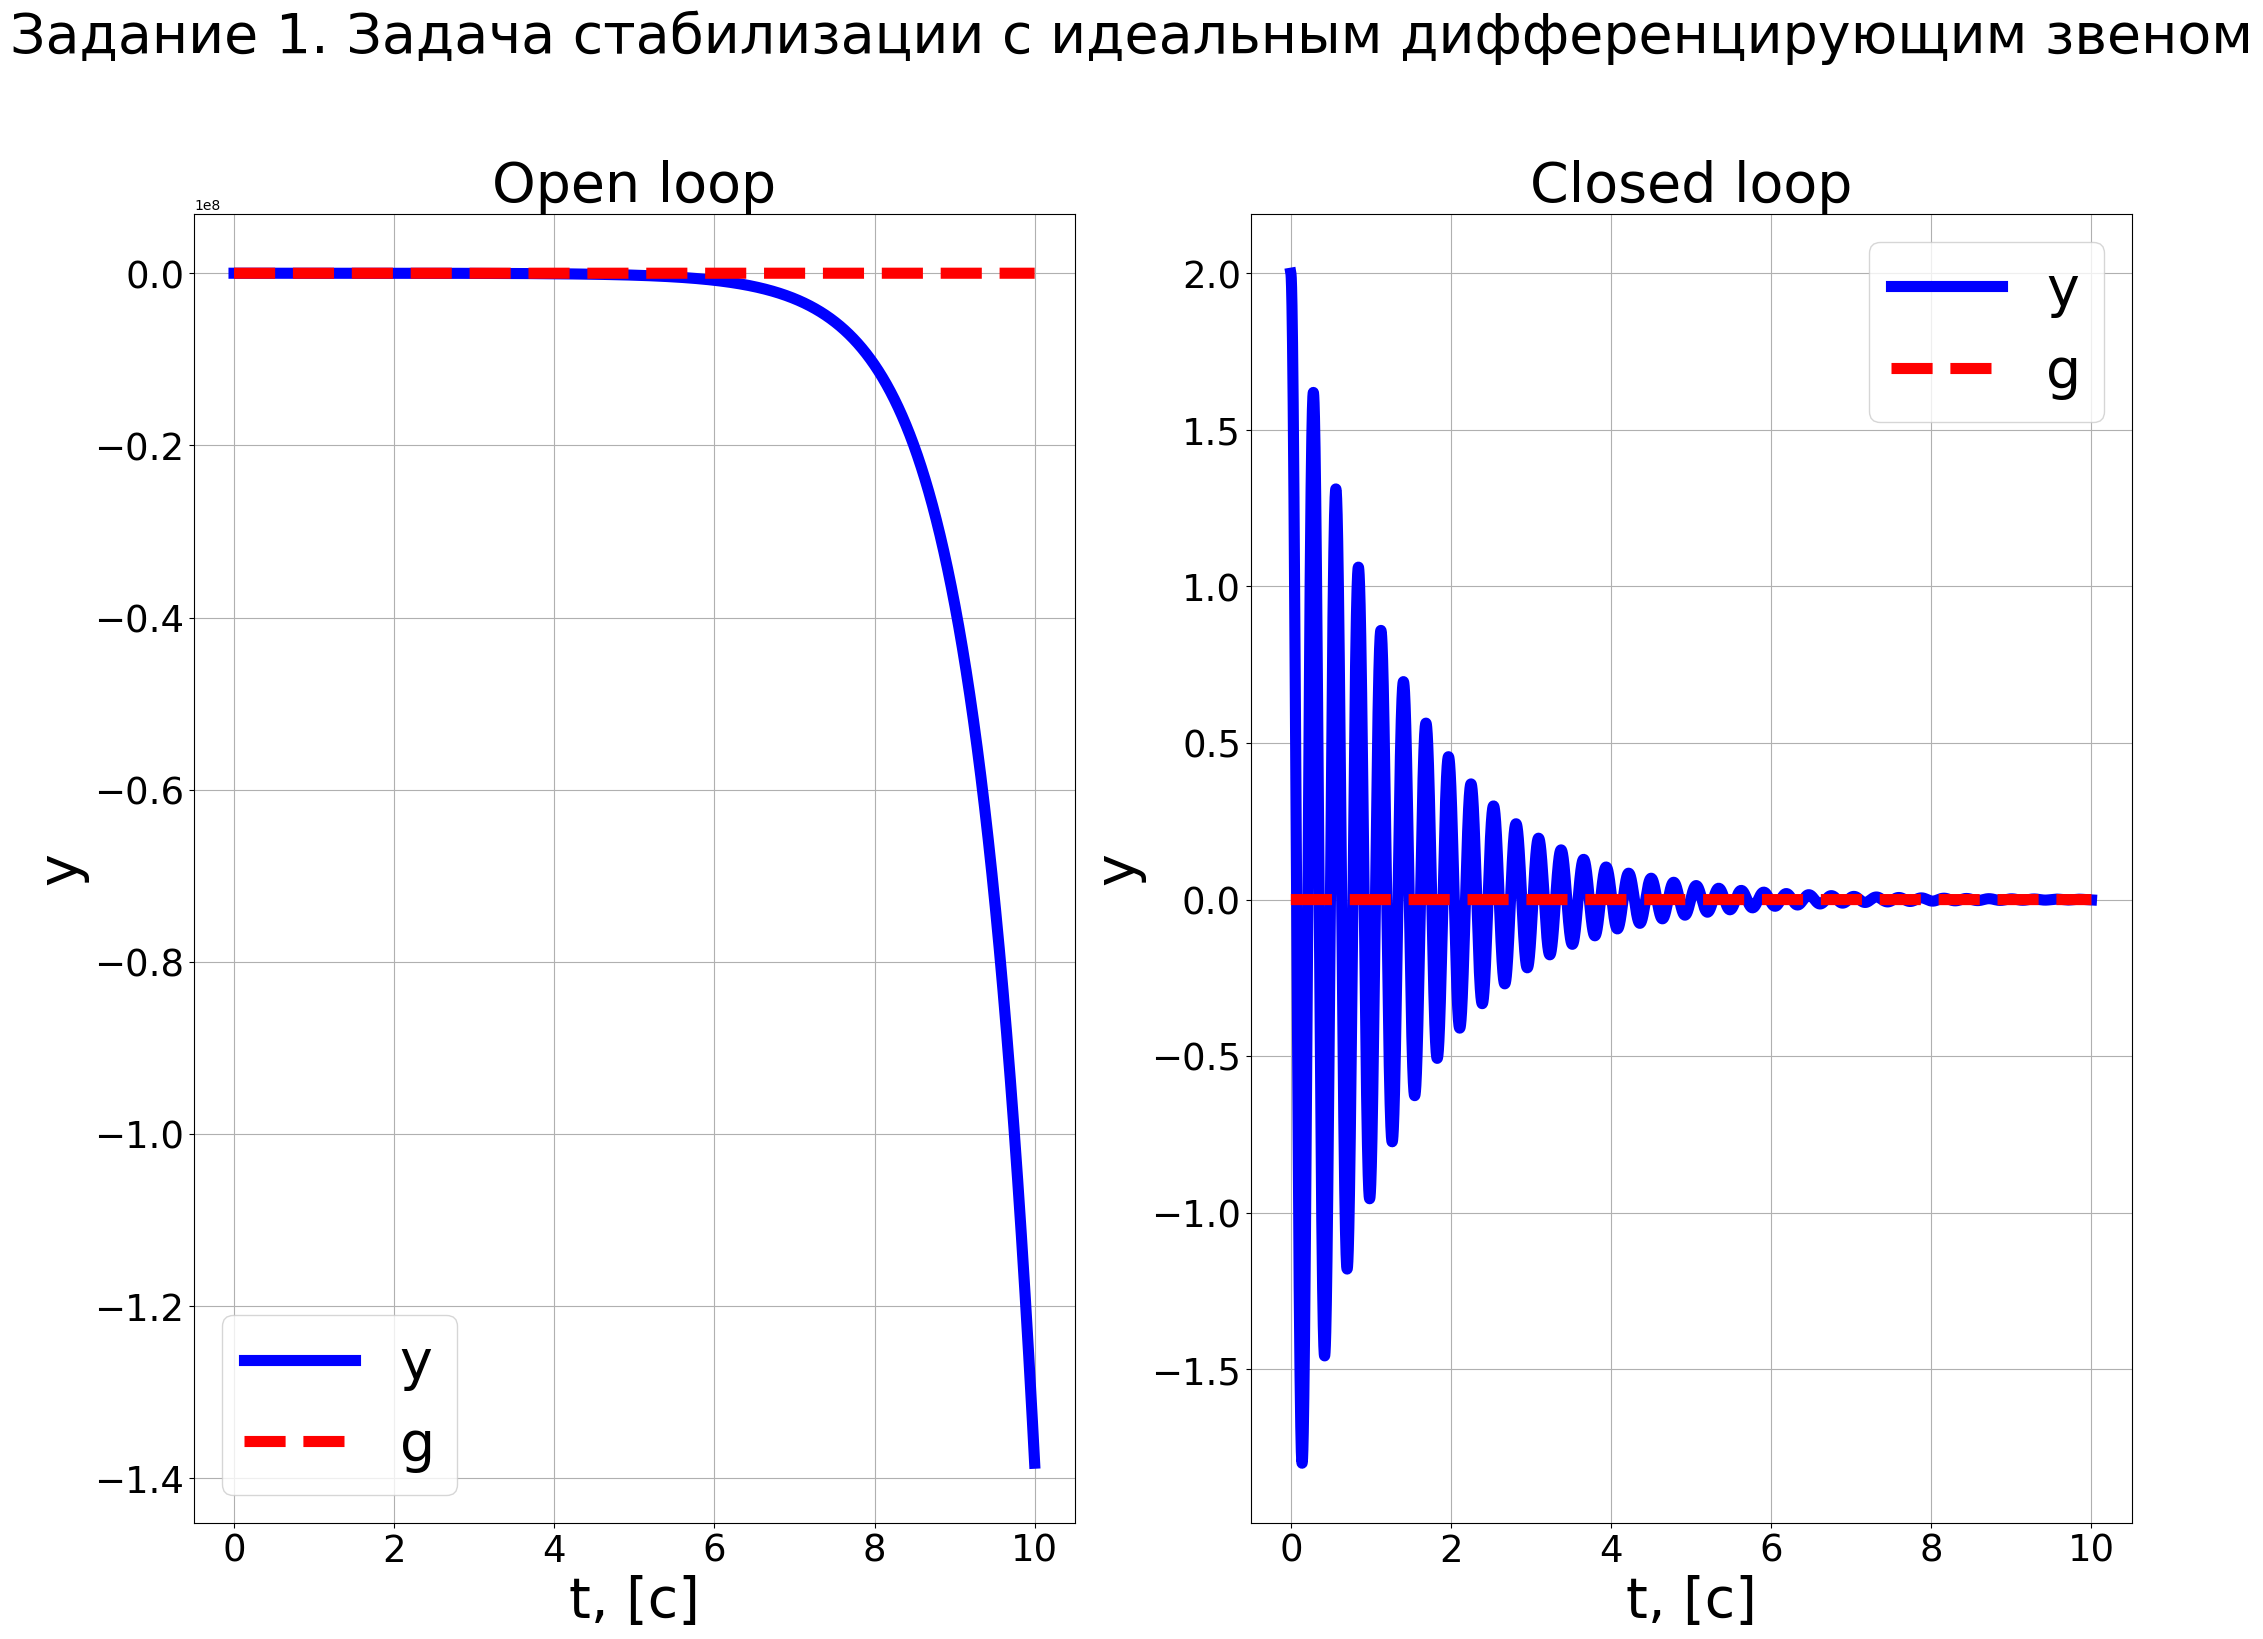

In [15]:
dt = 0.001
m1, m2 = -2, 2

ts = get_t(10, dt=dt)
k0, k1 = 1000, 4
g = lambda t: 0 + 0 * t

task1_closed, _ = task1_simulate(m1, m2, k0, k1, ts, dt, g(ts))
task1_open, _ = task1_simulate(m1, m2, k0, k1, ts, dt, g(ts), closed_loop=False)
plot_task1(task1_open, task1_closed, g(ts), ts, 'task1.jpg')

Task 2

In [16]:
def task2_tfd(T):
    return control.tf([1, 0], [T, 1])

def task2_simulate_TF(m1, m2, T, k0, k1, ts, gs, y0=2):
    TF = task1_tf(m1, m2)
    TFd = task2_tfd(T)
    PD = k0 + k1 * TFd
    system = control.feedback(PD * TF, 1, -1)
    system_reachable = control.canonical_form(control.tf2ss(system), form="reachable")[0]
    X0 = np.linalg.pinv(system_reachable.C) * [y0]
    return control.forced_response(system_reachable, ts, U = gs, X0 = X0).outputs

def plot_task2(ys_open, ys_closed, gs, ts, save_name):
    f_size = 40
    fig, axs = plt.subplots(1, 2, figsize=(25, 17))
    fig.suptitle(f"Задание 1. Задача стабилизации с идеальным дифференцирующим звеном", fontsize=f_size, y=1)

    axs[0].plot(ts, ys_open, 'b', linewidth=8, label = 'y')
    axs[0].plot(ts, gs, 'r--', linewidth=8, label = f'g')
    axs[0].set_title(f"Open loop", fontsize=f_size)
    axs[0].set_xlabel(f"t, [c]", fontsize=f_size)
    axs[0].set_ylabel(f"y", fontsize=f_size)
    axs[0].tick_params(axis='both', which='major', labelsize=f_size/1.5)
    axs[0].tick_params(axis='both', which='minor', labelsize=f_size/1.5)
    
    axs[0].grid(True)
    axs[0].legend(fontsize=f_size, title_fontsize=f_size)
    
    axs[1].plot(ts, ys_closed, "b", linewidth=8, label = 'y')
    axs[1].plot(ts, gs, "r--", linewidth=8, label = 'g')
    axs[1].set_title(r"Closed loop", fontsize=f_size)
    axs[1].set_xlabel(f"t, [c]", fontsize=f_size)
    axs[1].set_ylabel(r"y", fontsize=f_size)
    axs[1].tick_params(axis='both', which='major', labelsize=f_size/1.5)
    axs[1].tick_params(axis='both', which='minor', labelsize=f_size/1.5)
    axs[1].grid(True)
    axs[1].legend(fontsize=f_size, title_fontsize=f_size)
    
    plt.savefig(f'{SAVE_PATH}/{save_name}')
    plt.show()

In [18]:
W = 1 / sympy.simplify((s - m1) * (s - m2))
dW = s / (T * s + 1)
open_loop_sympy = (k0 + k1 * dW) * W
closed_loop_sympy = (open_loop_sympy / (1 + open_loop_sympy)).simplify()
denum = sympy.fraction(closed_loop_sympy)[1]
routh_matrix = routh(sympy.Poly(denum, s))
sympy.solve([e > 0 for e in routh_matrix[:, 0]], T, rational=True, simplify=True)

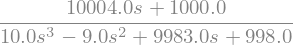

In [17]:
closed_loop_sympy.simplify()

In [9]:
-3 / 1996 - np.sqrt(11985) / 1996, -3 / 1996 + np.sqrt(11985) / 1996

0.001
[1, -1, -2]
0.01
[1, -1, -2]
0.0533447017898548
[1, -1, -2]
0.1
[1, -1, -2]


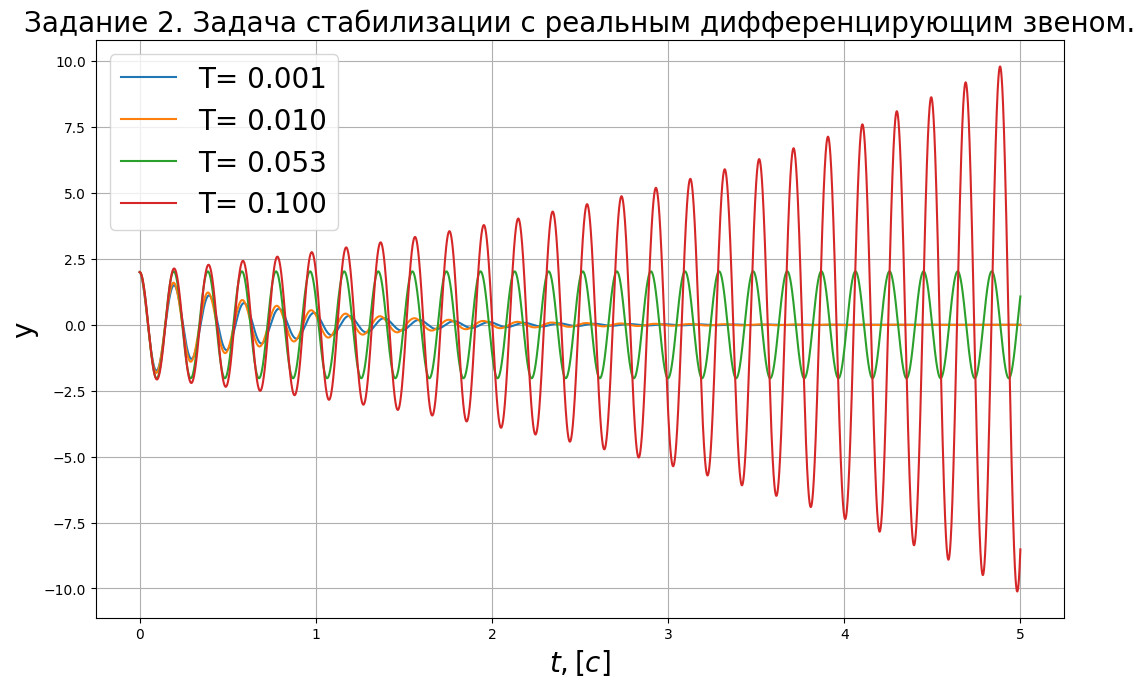

In [10]:
T = 10**-5
plt.figure(figsize=(12.5, 7.5))
for T in [0.001, 0.01, 0.0533447017898548, 0.1]:
    print(T)
    ts = get_t(5, dt = min(0.0001, T / 100))
    task2_r = task2_simulate_TF(m1, m2, T, k0, k1, ts, g(ts))
    plt.plot(ts, task2_r, label = f'T={T: .3f}')
    T *= 100
# T = 0.0533447017898548
# ts = get_t(5, dt = T / 100)
# task2_r = task2_simulate_TF(m1, m2, T, k0, k1, ts, g(ts))
# plt.plot(ts, task2_r, label = f'T={T}')
plt.title('Задание 2. Задача стабилизации с реальным дифференцирующим звеном.', fontsize=20)
plt.xlabel("$t, [c]$", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.savefig(f'{SAVE_PATH}/task2.jpg')
plt.show()

Task 3

In [ ]:
def fftnoise(f):
    f = np.array(f, dtype='complex')
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return np.fft.ifft(f).real

def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1/samplerate))
    f = np.zeros(samples)
    idx = np.where(np.logical_and(freqs>=min_freq, freqs<=max_freq))[0]
    f[idx] = 1
    return fftnoise(f)

ts = get_t(10)
noise = band_limited_noise(0, len(ts), len(ts), len(ts))


In [ ]:

m1, m2 = -1, 2
task3_ys, _ = task1_simulate(m1, m2, k0, k1, ts, dt, g(ts))
task3_ys_noise, _ = task1_simulate(m1, m2, k0, k1, ts, dt, g(ts) + noise)
task3_ys_noise10, _ = task1_simulate(m1, m2, k0, k1, ts, dt, g(ts) + noise*10)

plt.figure(figsize=(12.5, 7.5))
plt.plot(ts[:len(task3_ys_noise10)], task3_ys_noise10, label = f'10 * noise, Err = {np.sum((task3_ys_noise10 - task3_ys)**2):.2}')
plt.plot(ts[:len(task3_ys_noise)], task3_ys_noise, label = f'noise, Err = {np.sum((task3_ys_noise - task3_ys)**2):.2}')

plt.title('Задание 3. Исследование влияния шума.', fontsize=20)
plt.xlabel("$t, [c]$", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.savefig(f'{SAVE_PATH}/task3.jpg')
plt.show()

In [ ]:
plt.figure(figsize=(12.5, 7.5))
for T in [0.001, 0.01, 0.025]:
    print(T)
    task2_r = task2_simulate_TF(m1, m2, T, k0, k1, ts, g(ts) + noise)
    plt.plot(ts, task2_r, label = f'T={T: .3f}')
# plt.plot(ts[:len(task3_ys_noise10)], task3_ys_noise10, label = f'10 * noise, Err = {np.sum((task3_ys_noise10 - task3_ys)**2):.2}')
# plt.plot(ts[:len(task3_ys_noise)], task3_ys_noise, label = f'noise, Err = {np.sum((task3_ys_noise - task3_ys)**2):.2}')

plt.title('Задание 3. Исследование влияния шума.', fontsize=20)
plt.xlabel("$t, [c]$", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.savefig(f'{SAVE_PATH}/task3_ts.jpg')
plt.show()

In [ ]:
g(ts).shape, noise.shape

Task 4

In [ ]:
dt = 0.001

ts = get_t(10, dt=dt)

def task4_tf(m1, m2, bs):
    poly = sympy.simplify((p - m1) * (p - m2))
    coeffs = sympy.Poly(poly, p).all_coeffs()
    dev = float(coeffs[0])
    coeffs = np.array(coeffs, dtype=np.float64) / dev
    bs = np.array(bs) / dev
    return control.tf(bs, coeffs), coeffs[1:], bs

def get_limit_t4(K, t4_b1, t4_b0, t4_a1, t4_a0, u):
    b1, b0, a1, a0, k, t = sympy.symbols('b1 b0 a1 a0 k t')
    U = sympy.laplace_transform(u, t, s)[0]
    W_sympy = k * (b1 * s + b0) / (s**2 + a1*s + a0)
    W_closed = 1 / (1 + W_sympy)


    limit = (W_closed * U * s).subs({k:K, b1: t4_b1, b0: t4_b0, a1: t4_a1, a0: t4_a0})
    return float(sympy.N(sympy.limit(limit, s, 0)))

def t4_get_result(m1, m2, bs, K, u, ts):
    uf = sympy.lambdify(t, u)
    W, coeffs_a, coeffs_b = task4_tf(m1, m2, bs)
    W_open = K * W
    W_system = control.feedback(W_open, 1, -1)
    limit_e = get_limit_t4(K, *coeffs_b, *coeffs_a, u)
    y = control.forced_response(W_system, ts, uf(ts)).outputs
    return y, [uf(t) for t in ts], limit_e, coeffs_a, coeffs_b


In [ ]:
K = 100
u = 0*t + 1
m1, m2 = -3, -2
bs = [1, 1]
plt.figure(figsize=(12.5, 7.5))
for K in [0.1, 1, 10, 100, 1000]:
    ys, us, le, ca, cb = t4_get_result(m1, m2, bs, K, u, ts)
    plt.plot(ts, ys, label = f'k = {K}, e -> {le :.2f}')

plt.plot(ts, us, label = f'goal')
plt.title('Задание 4. Задача слежения для системы с астатизмом нулевого порядка.\n Влияние k.', fontsize=20)
plt.xlabel("$t, [c]$", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.grid(True)
plt.legend(fontsize=15)
plt.savefig(f'{SAVE_PATH}/task4_const.jpg')
plt.show()

In [ ]:
K = 100
u = 1*t + 1
m1, m2 = -3, -2
bs = [1, 1]
plt.figure(figsize=(12.5, 7.5))
for K in [0.1, 1, 10, 100, 1000]:
    ys, us, le, ca, cb = t4_get_result(m1, m2, bs, K, u, ts)
    plt.plot(ts, ys, label = f'k = {K}, e -> {le :.2f}')

plt.plot(ts, us, label = f'goal')
plt.title('Задание 4. Задача слежения для системы с астатизмом нулевого порядка.\n Влияние k.', fontsize=20)
plt.xlabel("$t, [c]$", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.grid(True)
plt.legend(fontsize=15)
plt.savefig(f'{SAVE_PATH}/task4_lin.jpg')
plt.show()

In [ ]:
K = 100
u = sympy.sin(t)
m1, m2 = -3, -2
bs = [1, 1]
plt.figure(figsize=(12.5, 7.5))
for K in [0.1, 1, 10, 100, 1000]:
    ys, us, le, ca, cb = t4_get_result(m1, m2, bs, K, u, ts)
    plt.plot(ts, ys, label = f'k = {K}')

plt.plot(ts, us, label = f'goal')
plt.title('Задание 4. Задача слежения для системы с астатизмом нулевого порядка.\n Влияние k.', fontsize=20)
plt.xlabel("$t, [c]$", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.grid(True)
plt.legend(fontsize=15)
plt.savefig(f'{SAVE_PATH}/task4_sin.jpg')
plt.show()

Task 5

In [ ]:
dt = 0.001

ts = get_t(10, dt=dt)

def get_limit_t5(K0, K1, t4_b1, t4_b0, t4_a1, t4_a0, u):
    b1, b0, a1, a0, k0, k1, t = sympy.symbols('b1 b0 a1 a0 k0 k1 t')
    U = sympy.laplace_transform(u, t, s)[0]
    W_sympy = (k0 + k1 / s) * (b1 * s + b0) / (s**2 + a1*s + a0)
    W_closed = 1 / (1 + W_sympy)

    limit = (W_closed * U * s).subs({k0:K0, k1:K1, b1: t4_b1, b0: t4_b0, a1: t4_a1, a0: t4_a0})
    return float(sympy.N(sympy.limit(limit, s, 0)))

def t5_get_result(m1, m2, bs, K0, K1, u, ts):
    uf = sympy.lambdify(t, u)
    W, coeffs_a, coeffs_b = task4_tf(m1, m2, bs)
    W_open = (K0 + control.tf([K1], [1, 0])) * W
    W_system = control.feedback(W_open, 1, -1)
    limit_e = get_limit_t5(K0, K1, *coeffs_b, *coeffs_a, u)
    y = control.forced_response(W_system, ts, uf(ts)).outputs
    return y, [uf(t) for t in ts], limit_e, coeffs_a, coeffs_b


In [ ]:
K1, K0 = 10, 10
u = 0*t**1 + 1
m1, m2 = -3, -2 
bs = [1, 1]
plt.figure(figsize=(12.5, 7.5))
for K1 in [0.1, 1, 10, 100, 1000]:
    ys, us, le, ca, cb = t5_get_result(m1, m2, bs, K0, K1, u, ts)
    plt.plot(ts, ys, label = f'$k1$ = {K1}, e -> {le}')

plt.plot(ts, us, label = f'goal')
plt.title(f'Задание 5. Задача слежения для системы с астатизмом первого порядка.\n Влияние $k_1$; $k_0={K0}$.', fontsize=20)
plt.xlabel("$t, [c]$", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.grid(True)
plt.legend(fontsize=15)
plt.savefig(f'{SAVE_PATH}/task5_k1_const.jpg')
plt.show()

In [ ]:
K1, K0 = 10, 10
u = 1*t**1 + 1
m1, m2 = -3, -2 
bs = [1, 1]
plt.figure(figsize=(12.5, 7.5))
for K1 in [0.1, 1, 10, 100, 1000]:
    ys, us, le, ca, cb = t5_get_result(m1, m2, bs, K0, K1, u, ts)
    plt.plot(ts, ys, label = f'$k1$ = {K1}, e -> {le}')

plt.plot(ts, us, label = f'goal')
plt.title(f'Задание 5. Задача слежения для системы с астатизмом первого порядка.\n Влияние $k_1$; $k_0={K0}$.', fontsize=20)
plt.xlabel("$t, [c]$", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.grid(True)
plt.legend(fontsize=15)
plt.savefig(f'{SAVE_PATH}/task5_k1_lin.jpg')
plt.show()

In [ ]:
K1, K0 = 10, 10
u = sympy.sin(t)
m1, m2 = -3, -2 
bs = [1, 1]
plt.figure(figsize=(12.5, 7.5))
for K1 in [0.1, 1, 10, 100, 1000]:
    ys, us, le, ca, cb = t5_get_result(m1, m2, bs, K0, K1, u, ts)
    plt.plot(ts, ys, label = f'$k1$ = {K1}, e -> {le}')

plt.plot(ts, us, label = f'goal')
plt.title(f'Задание 5. Задача слежения для системы с астатизмом первого порядка.\n Влияние $k_1$; $k_0={K0}$.', fontsize=20)
plt.xlabel("$t, [c]$", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.grid(True)
plt.legend(fontsize=15)
plt.savefig(f'{SAVE_PATH}/task5_k1_sin.jpg')
plt.show()

In [ ]:
K1, K0 = 10, 10
u = 0*t**1 + 1
m1, m2 = -3, -2 
bs = [1, 1]
plt.figure(figsize=(12.5, 7.5))
for K0 in [0.1, 1, 10, 100, 1000]:
    ys, us, le, ca, cb = t5_get_result(m1, m2, bs, K0, K1, u, ts)
    plt.plot(ts, ys, label = f'$k0$ = {K0}, e -> {le}')

plt.plot(ts, us, label = f'goal')
plt.title(f'Задание 5. Задача слежения для системы с астатизмом первого порядка.\n Влияние $k_0$; $k_1={K1}$.', fontsize=20)
plt.xlabel("$t, [c]$", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.grid(True)
plt.legend(fontsize=15)
plt.savefig(f'{SAVE_PATH}/task5_k0_const.jpg')
plt.show()

In [ ]:
K1, K0 = 10, 10
u = 1*t**1 + 1
m1, m2 = -3, -2 
bs = [1, 1]
plt.figure(figsize=(12.5, 7.5))
for K0 in [0.1, 1, 10, 100, 1000]:
    ys, us, le, ca, cb = t5_get_result(m1, m2, bs, K0, K1, u, ts)
    plt.plot(ts, ys, label = f'$k0$ = {K0}, e -> {le}')

plt.plot(ts, us, label = f'goal')
plt.title(f'Задание 5. Задача слежения для системы с астатизмом первого порядка.\n Влияние $k_0$; $k_1={K1}$.', fontsize=20)
plt.xlabel("$t, [c]$", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.grid(True)
plt.legend(fontsize=15)
plt.savefig(f'{SAVE_PATH}/task5_k0_lin.jpg')
plt.show()

In [ ]:
K1, K0 = 10, 10
u = sympy.sin(t)
m1, m2 = -3, -2 
bs = [1, 1]
plt.figure(figsize=(12.5, 7.5))
for K0 in [0.1, 1, 10, 100, 1000]:
    ys, us, le, ca, cb = t5_get_result(m1, m2, bs, K0, K1, u, ts)
    plt.plot(ts, ys, label = f'$k0$ = {K0}, e -> {le}')

plt.plot(ts, us, label = f'goal')
plt.title(f'Задание 5. Задача слежения для системы с астатизмом первого порядка.\n Влияние $k_0$; $k_1={K1}$.', fontsize=20)
plt.xlabel("$t, [c]$", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.grid(True)
plt.legend(fontsize=15)
plt.savefig(f'{SAVE_PATH}/task5_k0_sin.jpg')
plt.show()

Task 6

In [ ]:
w1, w2 = 3, 2
alpha = 1


g = sympy.sin(w1*t) * sympy.cos(w2*t) * alpha
G = sympy.laplace_transform(g, t, s)[0]
Ng, Dg = sympy.fraction(G)
W = 1 / s ** 2
Nw, Dw = sympy.fraction(W)

In [ ]:
G

In [ ]:
r, Nr, a0, a1, a2, a3, a4 = sympy.symbols('r Nr a0:5')
Dr = Dg * (s + r)
Nr = a3 * s**3 + a2 * s**2 + a1 * s + a0

In [ ]:
denum = sympy.collect((Dr + Nr).expand(), s)
desired = 1
for i in range(1, 6):
    desired *= s + i

In [ ]:
sympy.collect(denum.evalf(subs={a0: -255, r: 15,a3: 59,a2: -165,a1: 249}).expand(), s)

In [ ]:
sympy.Poly(desired)

In [ ]:
Dr = Dg * (s + 15)
Dr.expand()

In [ ]:
TF_r = control.tf([59, -165, 249, -255, 0, 0], [1, 15, 26, 390, 25, 375])
TF = control.tf([1], [1, 0, 0])

In [ ]:
TF_e = 1 / (1 + TF * TF_r)
TF_y = TF * TF_r / (1 + TF * TF_r)
fg = lambda t: np.sin(w1*t) * np.cos(w2*t)

In [ ]:
ts = get_t(10)
y = control.forced_response(TF_y, ts, fg(ts)).outputs
e = control.forced_response(TF_e, ts, fg(ts)).outputs


In [ ]:
plt.figure(figsize=(12.5, 7.5))
plt.plot(ts, y, label='y')
plt.plot(ts, fg(ts), label='goal')
plt.plot(ts, e, label='error')
plt.title('Задание 6. Исследование линейной системы замкнутой регулятором общего вида.', fontsize=20)
plt.xlabel("$t, [c]$", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.grid(True)
plt.legend(fontsize=15)
plt.savefig(f'{SAVE_PATH}/task6.jpg')
plt.show()